# BX-Crossing Dataset EDA

<br>
<br>

This BX-Crossing dataset is collected by Cai-Nicolas Ziegler in a 4-week crawl (August / September 2004) from the Book-Crossing community with kind permission from Ron Hornbaker, CTO of Humankind Systems. 

There are 3 tables (BX-Users, BX-Books and BX-Book-Ratings) 

BX-Users:
    - User-ID (length is 1 to 6)
    - Location (a lot of data are typo, n/a, synonyms [e.g: u.s.a., us, usa, united state])
    - Age (Around 100k record is null)
    
BX-Books: (Obtained from Amazon Web Services)
    - ISBNs (Only 1 ISBNs is Invalid)
    - Book-Title
    - Book-Author
    - Year-Of-Publication
    - Publisher
    - Image-URL-S (Point to the Amazon web site)
    - Image-URL-M (Point to the Amazon web site)
    - Image-URL-L (Point to the Amazon web site)

BX-Book-Ratings:
    - User-ID (length is 1 to 6)
    - ISBNs (Around 8k of record ISBNs are invalid)
    - Book-Rating (Range is 0 to 10)
        
<br>
<br>
<br>
<br>
<br>

## Contents
* [1. Importing the XBooks Dataset](#section_1)
    * [a. BX-Book-Dataset Overview](#section_1a)
    * [b. Data Integrity and Referential Integrity Checks](#section_1b)
* [2. Data Cleaning](#section_2)
    * [a. Column names](#section_2a)
    * [b. Duplicates](#section_2b)
    * [c. Missing values](#section_2c)
    * [d. ISBN format errors](#section_2d)
    * [e. Merge](#section_2e)
* [3. Descriptive Stats](#section_3)
    * [a. Ratings](#section_3a)
    * [a. Popular books](#section_3b)
    * [b. Most active users](#section_3c)
* [4. Data Analysis](#section_4)
    * [a. Global markets](#section_4a)
    * [b. Closer look at US market](#section_4b)
    * [c. Rating distribution](#section_4c)
    * [d. Rating practices by country](#section_4d)
    * [e. Ratings vs publication year](#section_4e)
* [5. Key Takeaways](#section_5)
    * [a. Summary of the EDA](#section_5a)
    * [b. Problems faced and Challenges](#section_5b)
<br>
<br>
<br>

<br>

## Importing the XBooks Dataset <a class="anchor" id="section_1"></a>

<br>

The XBooks Dataset is small enough to include within the repo.

<br>

<br>

First import libraries to handle dataframes, arrays, and plotting:

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns # other visualization tools, high level ploting language

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
mpl.rcParams['figure.figsize'] = (13, 8) #default figure size, low level ploting language, easy to customizable

<br>

And import our cleaning script:

In [2]:
from Data_cleaning import get_merged_data_frame, get_clean_data

<br>

Our cleaning script will automatically import and clean the data. 

The script outputs three dataframes, which needs to be stored as variables (df_books, df_users, df_ratings):

In [3]:
df_books, df_users, df_ratings = get_clean_data()
df_merged = get_merged_data_frame()

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
/Applications/anaconda3/lib/python3.6/site-packages/IPython/core/interacti

<br>

## BX-Book-Dataset Overview <a class='anchor' id='section_1a'></a>

<br>

The data is split into three seperate tables (which we will merge later), and we can have a quick look at what they contain. 

<br>
<br>

First for BX-Book-Ratings.csv:

In [4]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
user      1149780 non-null int64
isbn      1149780 non-null object
rating    1149780 non-null int64
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [5]:
df_ratings.head()

,user,isbn,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


<br>

For BX-Books.csv:

In [6]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271357 entries, 0 to 271359
Data columns (total 8 columns):
isbn         271357 non-null object
title        271357 non-null object
author       271356 non-null object
pub_year     266722 non-null float64
publisher    271355 non-null object
url_s        271357 non-null object
url_m        271357 non-null object
url_l        271357 non-null object
dtypes: float64(1), object(7)
memory usage: 18.6+ MB


In [7]:
df_books.head()

,isbn,title,author,pub_year,publisher,url_s,url_m,url_l
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


<br>

Finally for BX-Users.csv:

In [8]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 5 columns):
user        278858 non-null int64
location    278858 non-null object
age         167602 non-null float64
country     274248 non-null object
province    278857 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 10.6+ MB


In [9]:
df_users.head()

,user,location,age,country,province
0,1,"nyc, new york, usa",NaN,usa,new york
1,2,"stockton, california, usa",18.0,usa,california
2,3,"moscow, yukon territory, russia",NaN,russia,yukon territory
3,4,"porto, v.n.gaia, portugal",17.0,portugal,v.n.gaia
4,5,"farnborough, hants, united kingdom",NaN,united kingdom,hants


<br>

## Data Cleaning <a class = 'anchor' id = 'section_2'>

<br>

Some basic checks for missing, duplicate, and invalid values.

<br>

### Column Names <a class = 'anchor' id = 'section_2a'>
    
<br>

#### df_ratings:

In [10]:
df_ratings.columns

Index(['user', 'isbn', 'rating'], dtype='object')

#### df_books:

In [11]:
df_books.columns

Index(['isbn', 'title', 'author', 'pub_year', 'publisher', 'url_s', 'url_m',
       'url_l'],
      dtype='object')

#### df_users:

In [12]:
df_users.columns

Index(['user', 'location', 'age', 'country', 'province'], dtype='object')

<br>

### Duplicates <a class = 'anchor' id = 'section_2b'>

<br/>

#### df_ratings:

Check if there are duplicate records (where both the user and isbn are the same--even if the rating is different):

In [13]:
len(df_ratings) != len(df_ratings.drop_duplicates(subset=['user', 'isbn']))

False

#### df_books:
Again, check for duplicates in ISBNs:

In [14]:
len(df_books) != len(df_books.isbn.unique())

False

#### df_users:

Check for duplicates:

In [15]:
len(df_users) != len(df_users.user.unique())

False

<br>

### Missing Values  <a class="anchor" id="section_2c">
<br>
    
#### df_ratings:
Check for missing values. Yellow is missing data, purple is good data.

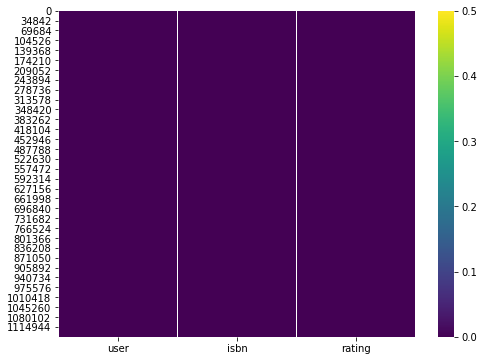

In [16]:
plt.subplots(figsize=(8,6))
sns.heatmap(df_ratings.isnull(), cmap='viridis', vmin=0, vmax=0.5)
plt.show()

<br>

#### df_books:

Check for missing values, yellow is missing:

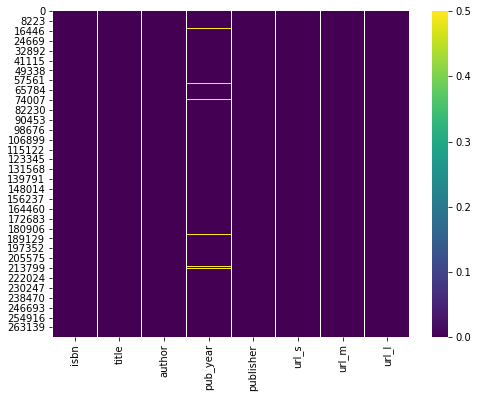

In [17]:
plt.subplots(figsize=(8,6))
sns.heatmap(df_books.isnull(), cmap='viridis', vmin=0, vmax=0.5)
plt.show()

<br>

#### df_users:
Check for missing values. Again, yellow are missing values.

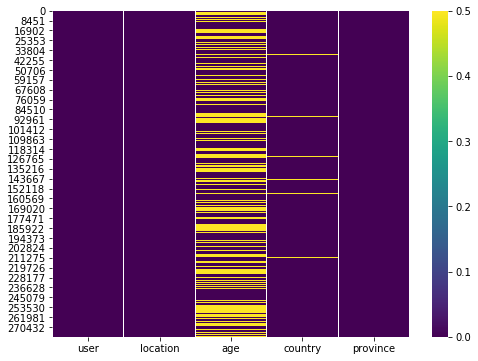

In [18]:
plt.subplots(figsize=(8,6))
sns.heatmap(df_users.isnull(), cmap='viridis', vmin=0, vmax=0.5)
plt.show()

Seems there are a lot of missing values in age. A couple in country as well. We'll also see that some categories in country don't make sense. We have cleaned up the more popular ones in the data cleaning script.

<br>

### ISBNs Format Error <a class="anchor" id="section_2d">
We can check if any invalid ISBNs are present (only length 10 and 13 are valid):

<br>

#### df_ratings:

<br>

In [19]:
# Valid ISBN Ref: https://isbnsearch.org/search?s=342310538
sorted(df_ratings['isbn'].astype(str).map(len).unique())

[8, 9, 10, 11, 12, 13, 14]

<br>
So we can see that there are some errors in the ISBN table.

<br>

<br>

We can check what proportion of ISBNs are corrupted:

Valid ISBN is: 1141103
Invalid ISBN is: 8677
The % of the Valid ISBN is: 0.9924533388996156
The % of the Invalid ISBN is: 0.007546661100384422


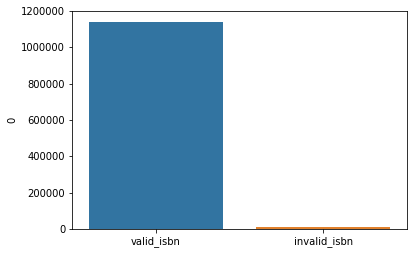

In [21]:
df_ratings_isbn_length = df_ratings['isbn'].astype(str).map(len).values

y = np.bincount(df_ratings_isbn_length)
ii = np.nonzero(y)[0]
result = np.vstack((ii,y[ii])).T

df_ratings_isbn_length_result = pd.DataFrame(result)
df_ratings_isbn_length_result = df_ratings_isbn_length_result.set_index([0])

del df_ratings_isbn_length_result.index.name

df_ratings_isbn_length_result.rename(columns={1:'count'}, inplace=True)

valid_isbn = df_ratings_isbn_length_result.loc[
    (df_ratings_isbn_length_result.index == 10) | 
    (df_ratings_isbn_length_result.index == 13), 'count'
].sum()

invalid_isbn = df_ratings_isbn_length_result.loc[
    ~((df_ratings_isbn_length_result.index == 10) | 
      (df_ratings_isbn_length_result.index == 13))
    , 'count'
].sum()

total_isbn = valid_isbn + invalid_isbn

print("Valid ISBN is: {}".format(valid_isbn))
print("Invalid ISBN is: {}".format(invalid_isbn))
print("The % of the Valid ISBN is: {}".format(valid_isbn/total_isbn))
print("The % of the Invalid ISBN is: {}".format(invalid_isbn/total_isbn))

isbn_ratio = np.array([valid_isbn, invalid_isbn], np.int32)
df_isbn_ratio = pd.DataFrame(isbn_ratio)

ax = sns.barplot(x=df_isbn_ratio.index, y=df_isbn_ratio[0])
ax.set_xticklabels(labels=['valid_isbn', 'invalid_isbn'])
plt.show()

<br>

#### df_books:

<br>

Find the valid ISBNs

Valid ISBN is: 271356
Invalid ISBN is: 1
The % of the Valid ISBN is: 0.9999963148177493
The % of the Invalid ISBN is: 3.6851822506882076e-06


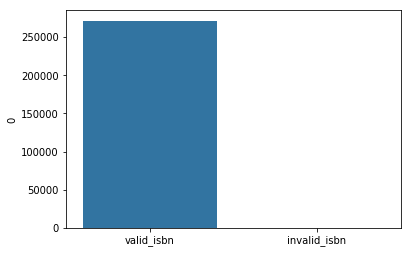

In [22]:
df_books_isbn_length = df_books['isbn'].astype(str).map(len).values

y2 = np.bincount(df_books_isbn_length)
ii2 = np.nonzero(y2)[0]
result2 = np.vstack((ii2,y2[ii2])).T

df_books_isbn_length_result = pd.DataFrame(result2)
df_books_isbn_length_result = df_books_isbn_length_result.set_index([0])

del df_books_isbn_length_result.index.name
df_books_isbn_length_result.rename(columns={1:'count'}, inplace=True)

valid_isbn2 = df_books_isbn_length_result.loc[
    (df_books_isbn_length_result.index == 10) | 
    (df_books_isbn_length_result.index == 13)
    , 'count'
].sum()

invalid_isbn2 = df_books_isbn_length_result.loc[
    ~((df_books_isbn_length_result.index == 10) | 
      (df_books_isbn_length_result.index == 13))
    , 'count'
].sum()

total_isbn2 = valid_isbn2 + invalid_isbn2

print("Valid ISBN is: {}".format(valid_isbn2))
print("Invalid ISBN is: {}".format(invalid_isbn2))
print("The % of the Valid ISBN is: {}".format(valid_isbn2/total_isbn2))
print("The % of the Invalid ISBN is: {}".format(invalid_isbn2/total_isbn2))

isbn_ratio2 = np.array([valid_isbn2, invalid_isbn2], np.int32)
df_isbn_ratio2 = pd.DataFrame(isbn_ratio2)
ax2 = sns.barplot(x=df_isbn_ratio2.index, y=df_isbn_ratio2[0])
ax2.set_xticklabels(labels=['valid_isbn', 'invalid_isbn'])

plt.show()

### Merge <a class="anchor" id="section_2e">

In [23]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031132 entries, 0 to 1031131
Data columns (total 14 columns):
user         1031132 non-null object
isbn         1031132 non-null object
rating       1031132 non-null int64
location     1031132 non-null object
age          751608 non-null float64
country      995420 non-null object
province     1031132 non-null object
title        1031132 non-null object
author       1031131 non-null object
pub_year     1017057 non-null float64
publisher    1031130 non-null object
url_s        1031132 non-null object
url_m        1031132 non-null object
url_l        1031132 non-null object
dtypes: float64(2), int64(1), object(11)
memory usage: 118.0+ MB


In [24]:
df_merged.head()

,user,isbn,rating,location,age,country,province,title,author,pub_year,publisher,url_s,url_m,url_l
0,276725,034545104X,0,"tyler, texas, usa",NaN,usa,texas,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,"cincinnati, ohio, usa",23.0,usa,ohio,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,"strafford, missouri, usa",34.0,usa,missouri,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,"st. charles county, missouri, usa",2.0,usa,missouri,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,"beaverton, oregon, usa",NaN,usa,oregon,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


<br>
<br>
<br>

## Descriptive Stats <a class='anchor' id='section_3'>
<br>
Now that we have all the data cleaned and merged into a single table, we can investigate in more detail.
    
<br>
<br>
<br>

### Ratings <a class="anchor" id="section_3a">
Have a look at all the unique ratings in df_ratings:

In [25]:
print(sorted(df_ratings['rating'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


<br>

And we can plot the ratings' distribution:

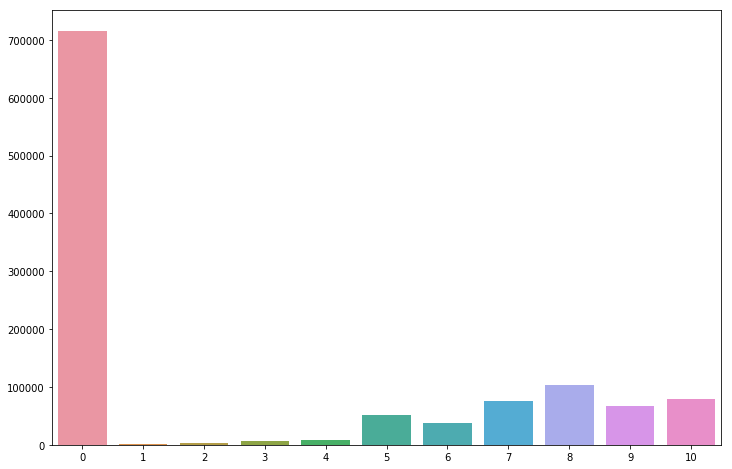

In [26]:
plt.subplots(figsize=(12,8))
sns.barplot(
    x=df_ratings['rating'].value_counts().index, 
    y=df_ratings['rating'].value_counts().values
)
plt.show()

<br>
<br>
<br>

### Most Popular Books <a class='anchor' id='section_3b'>
<br>
Let's have a look at which are the 100 highest selling books:

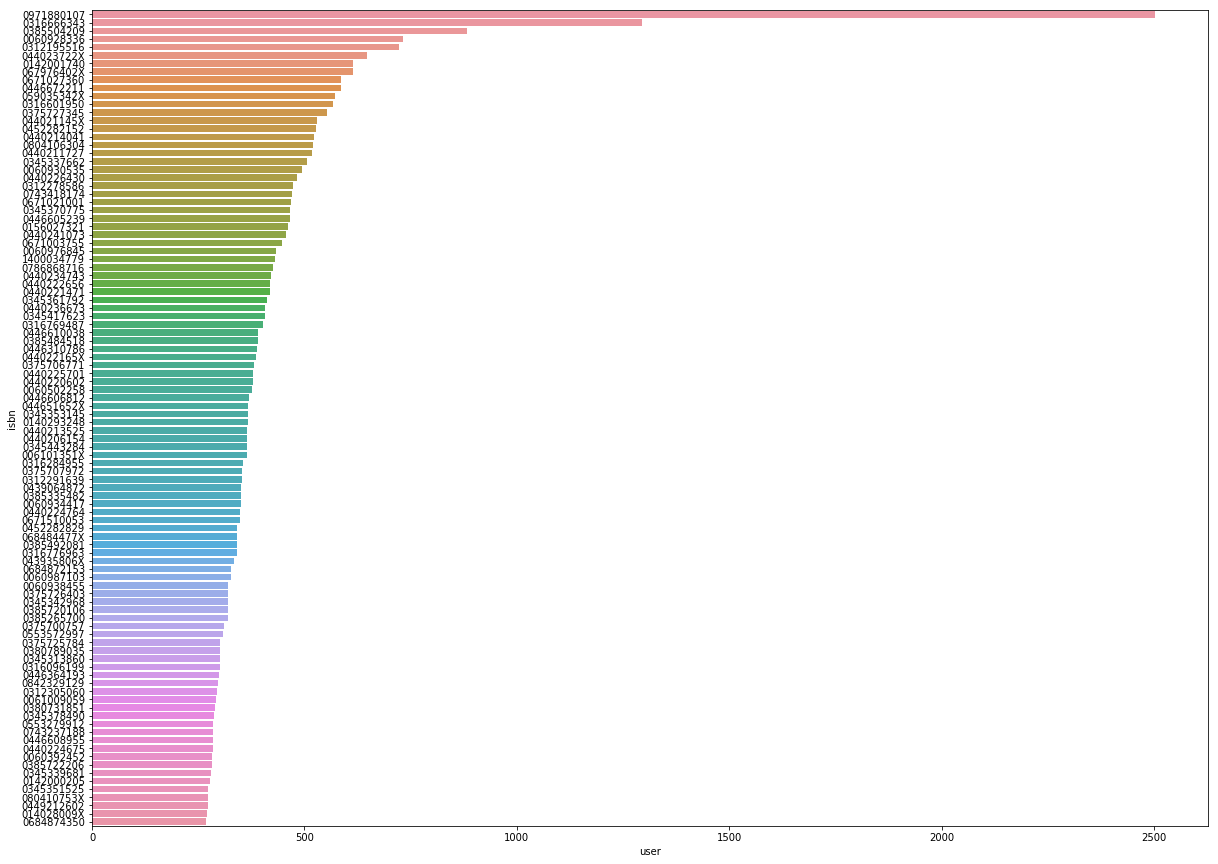

In [27]:
top_100_isbn = (
    df_merged.groupby('isbn')['user'].count().
    sort_values(ascending=False).head(100)
)
plt.subplots(figsize=(20,15))
sns.barplot(y=top_100_isbn.index,x=top_100_isbn, orient='h')
plt.show()

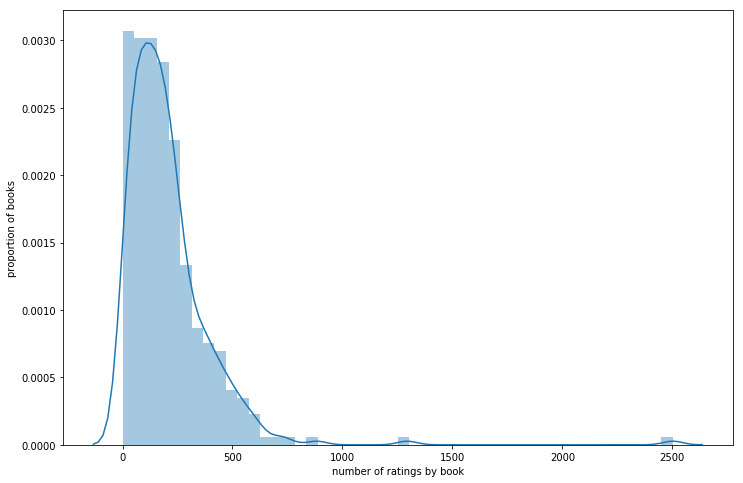

In [28]:
plt.subplots(figsize=(12,8))
sns.distplot(df_merged.groupby('isbn')['user'].count().unique())
plt.xlabel('number of ratings by book')
plt.ylabel('proportion of books')
plt.show()

<br>

### Most active users <a class='anchor' id='section_3c'>

<br>

We can use ratings to proxy books bought since both explicit and implicit ratings require a purchase.

First a quick look at the ratings distribution:

In [29]:
df_merged.groupby(by='user')['isbn'].count().sort_values(ascending=False).head(10)

user
11676     11144
198711     6456
153662     5814
98391      5779
35859      5646
212898     4289
278418     3996
76352      3329
110973     2971
235105     2943
Name: isbn, dtype: int64

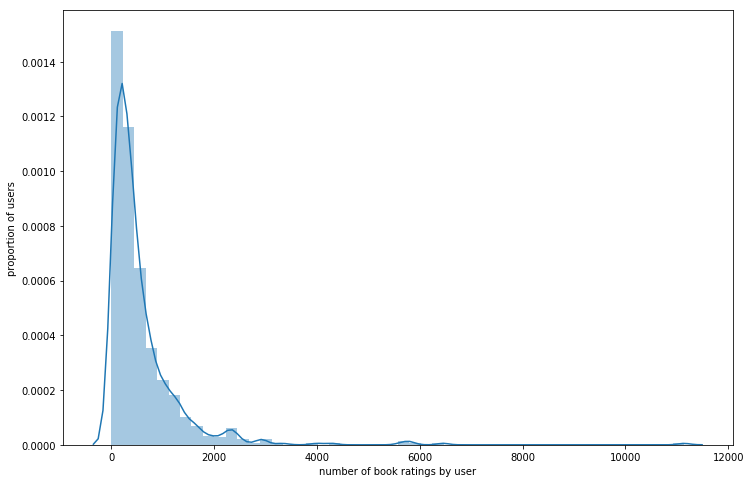

In [30]:
plt.subplots(figsize=(12,8))
sns.distplot(df_merged.groupby('user')['isbn'].count().unique())
plt.xlabel('number of book ratings by user')
plt.ylabel('proportion of users')
plt.show()

<br>

## Data Analytics <a class='anchor' id='section_4'>

<br>

we've now finished importing, cleaning, and taking a first look at the data. All that's left is to see if we can gain some deeper insight into the business using the XBook dataset.

<br>

### Global markets <a class='anchor' id='section_4a'>

<br>

How are our sales doing around the world?

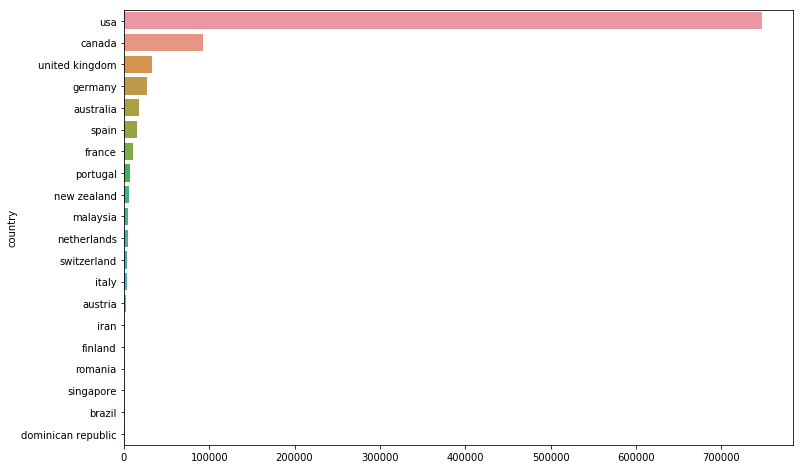

In [31]:
tmp = (
    df_merged.groupby('country')['user'].count().sort_values(ascending=False)
    .head(20)
)
plt.subplots(figsize=(12,8))
sns.barplot(y=tmp.index, x=tmp.values, orient='h')
plt.show()

<br>

We can see that the vast majority of our sales are to users based in the US. <a class='anchor' id='section_4b'>

<br>

We can have a closer look at where exactly in the US:

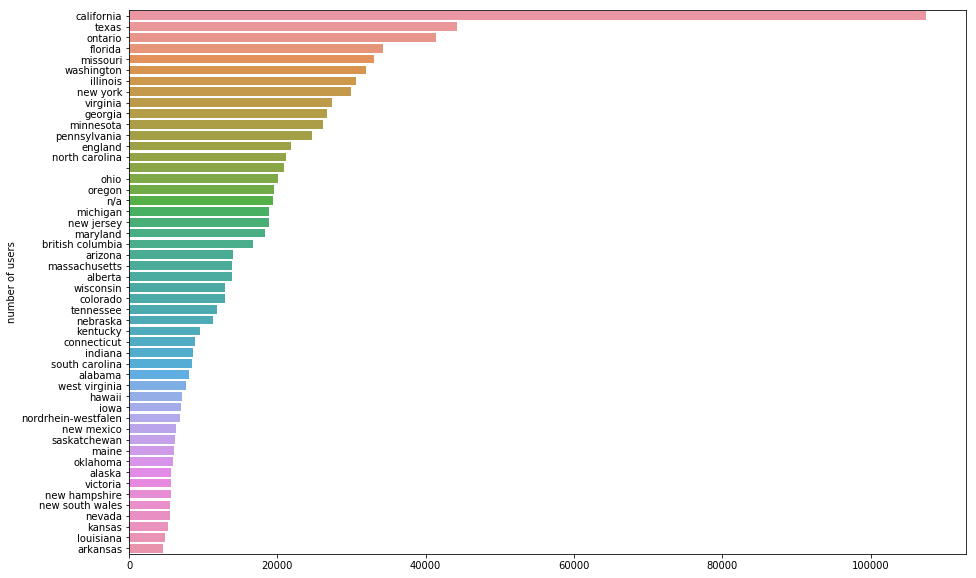

In [32]:
tmp = (
    df_merged.groupby('province')['user'].count().sort_values(ascending=False)
    .head(50)
)
plt.subplots(figsize=(15,10))
sns.barplot(y=tmp.index, x=tmp.values, orient='h')
plt.ylabel('number of users')
plt.show()

### Rating distribution <a class='anchor' id='section_4c'>

<br>

How do people rate books?

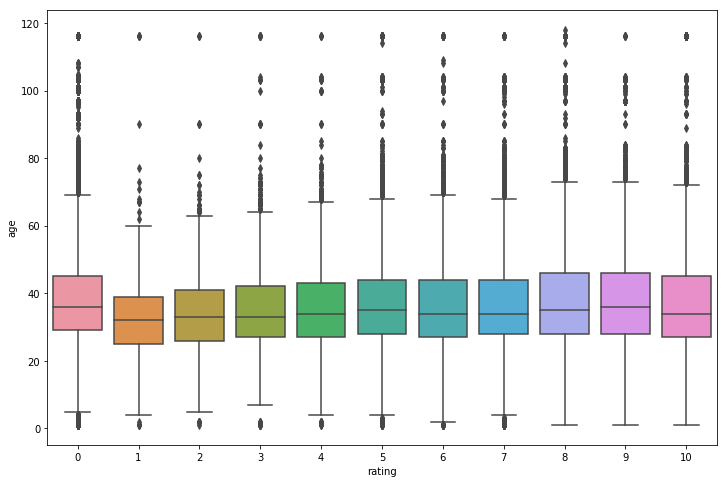

In [33]:
plt.subplots(figsize=(12,8))
sns.boxplot(y=df_merged.age, x=df_merged.rating)
plt.show()

People tend to rate books fairly consistently across the board, but the vast majority of people don't bother leaving ratings for their purchases.

<br>


<br>

### Rating practices by country <a class="anchor" id="section_4d">

<br>

Does peoples rating habits differ by country?

Rating values 0 are dropped


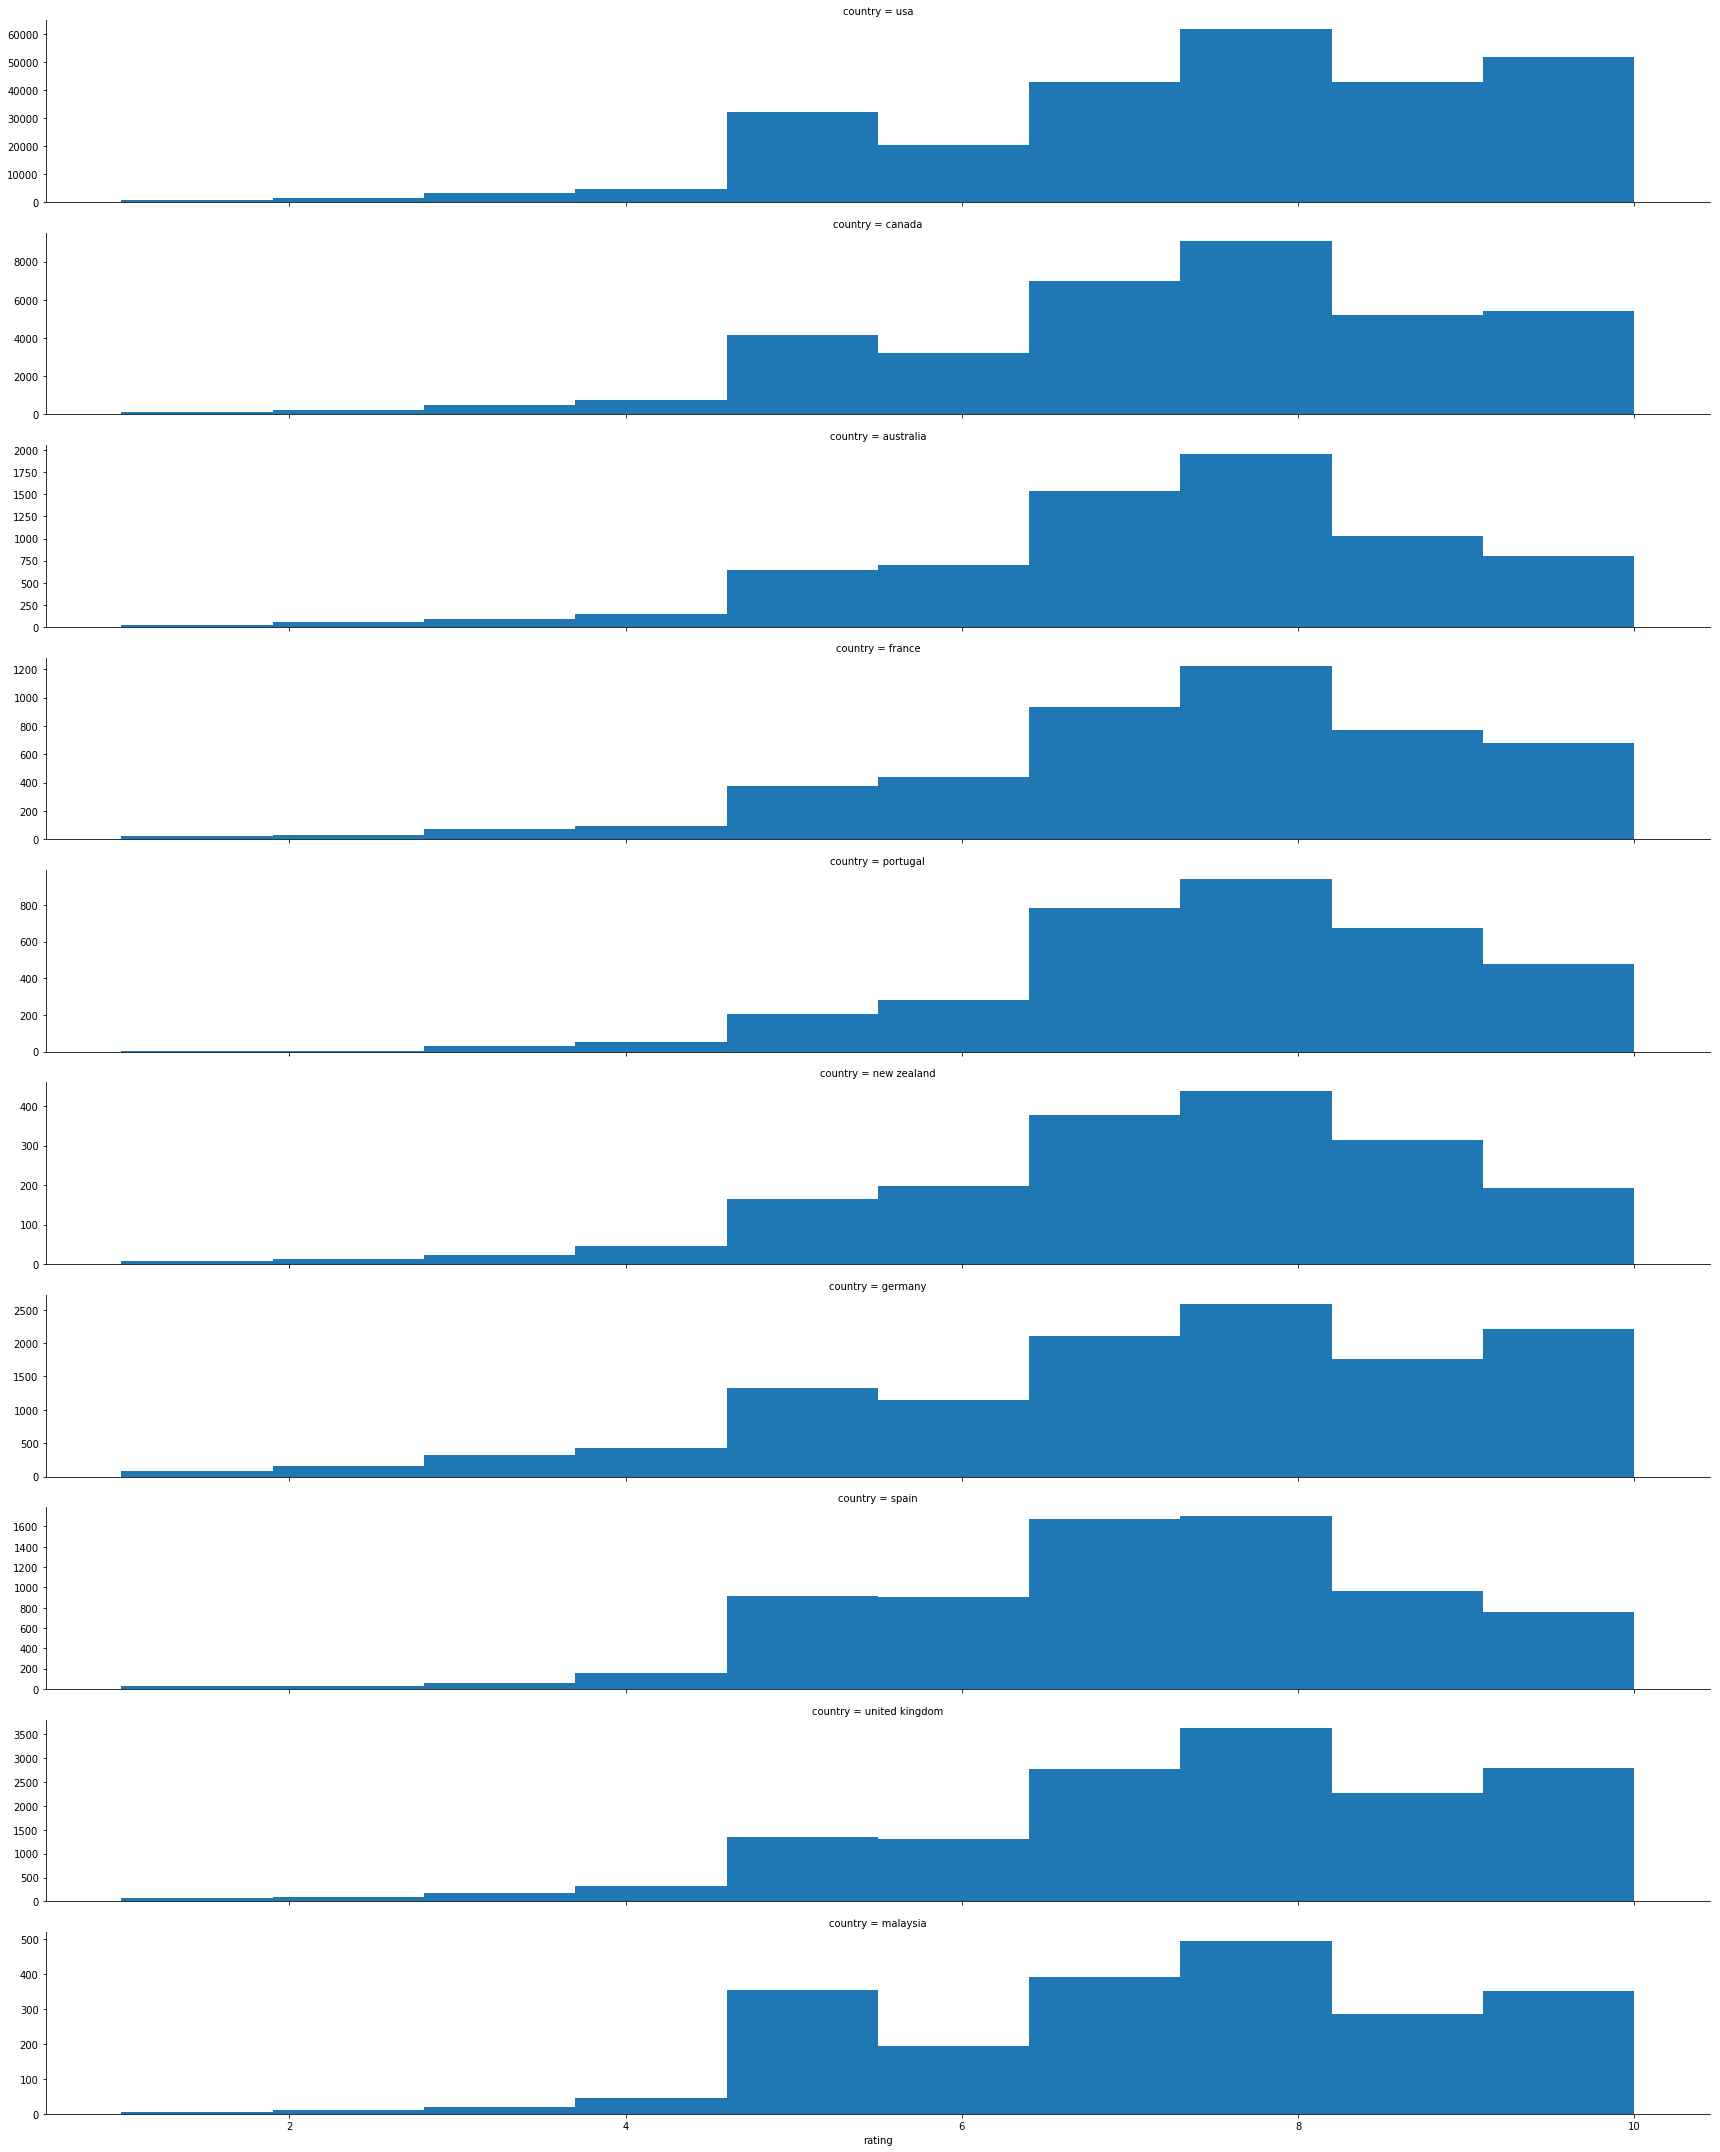

Rating values 0 are dropped


In [34]:
top_countries = list(
    df_merged.groupby('country')['user'].count().sort_values(ascending=False)
    .head(10).index
)
tmp = df_merged[df_merged.country.apply(lambda x: x in top_countries)]
tmp = tmp[tmp.rating > 0]
print('Rating values 0 are dropped')
g = sns.FacetGrid(tmp,  row="country", sharey=False, height=3, aspect=8)
g = g.map(plt.hist, "rating")
plt.show()
print('Rating values 0 are dropped')

<br>

### Ratings vs publication year <a class="anchor" id="section_4e">

<br>

Why are older books more favorably reviewed?

To answer, let's first look up the distribution of publication years:

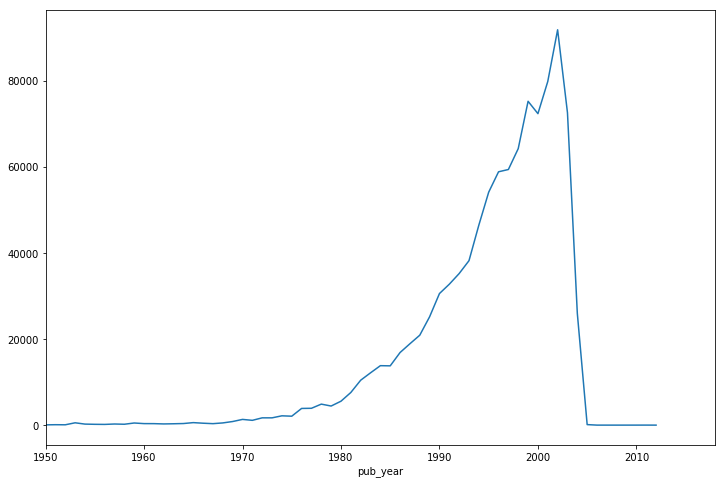

In [35]:
tmp = (
    df_merged.groupby('pub_year')['isbn'].count().sort_index()
)
plt.subplots(figsize=(12,8))
plt.xlim((1950, 2018))
sns.lineplot(x=tmp.index, y=tmp.values)
plt.show()

And now we can visualize how people rate older versus newer books.

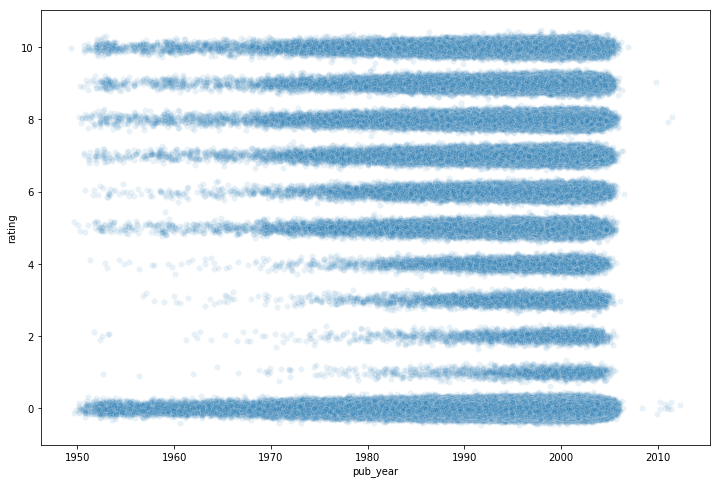

In [36]:
def rand_jitter(arr):
    stdev = .01*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

tmp = df_merged[['pub_year', 'rating']]
tmp = tmp[tmp.pub_year > 1950]

plt.subplots(figsize=(12,8))
sns.scatterplot(rand_jitter(tmp.pub_year), rand_jitter(tmp.rating), alpha=0.1)
plt.show()

It seems people rate older books more favorably than newer books. The scatterplot shows us that older books have tighter distributions centered on higher ratings. 

But we don't know if this is because people are biased to like older books, or that only better, well-performing books are still sold as time goes on.

<br>
<br>

<br>

## Key Takeaways <a class='anchor' id='section_5'>
    
<br>

### Summary of the EDA: <a class="anchor" id="section_5a">

1. Around 100k of user does not have the age information.
2. Most of the user is from USA, unsurprising as the data is from Amazon.
3. Older books compare with newer books are most likely have the high rating.
4. Since the data is cut off in 2004, that explain the steep decline in the no. of books after 2004.

### Problems faced and Challenges: <a class="anchor" id="section_5b">
1. The Location data from BX-Users table, a lot of record contain typo, n/a, synonyms, we have made a list to combine it as a same place.

2. Each team request the data format are not the same, our team would like to provide a flexible python script to generate the clean data and the merge data.

3. The project only have 3 days, it is not allowed to spend too much time on EDA, we take the approach is load out the data cleaning script, and then do the EDA after.